# OpenET PT-JPL - Water Surface

Compute PT-JPL ET for a single Landsat 8 Collection 1 TOA image.

In [1]:
import pprint
import numpy as np
import math
import ee
from IPython.display import Image
import openet.ptjpl as ptjpl

ee.Initialize(use_cloud_api=False)

### Input Parameters

In [2]:
landsat_id = 'LC08_044034_20170716'
# landsat_id = 'LC08_044033_20170801'

ndvi_palette = ['#EFE7E1', '#003300']
water_palette = ['#EFE7E1', '#000033']
et_palette = [
  'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
  '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']
albedo_palette = ['#000000', '#FFFFFF']
emissivity_palette = ['#FFFFFF', '#000000']
lst_palette = ['#000000', '#50127b', '#b63679', '#fc8761', '#fcfdbf']
rainbow_palette = ['#FF0000', '#FFA500', '#FFFF00', '#008000', '#0000FF', '#4B0082', '#EE82EE']

### Landsat 8 Collection 1 TOA Image

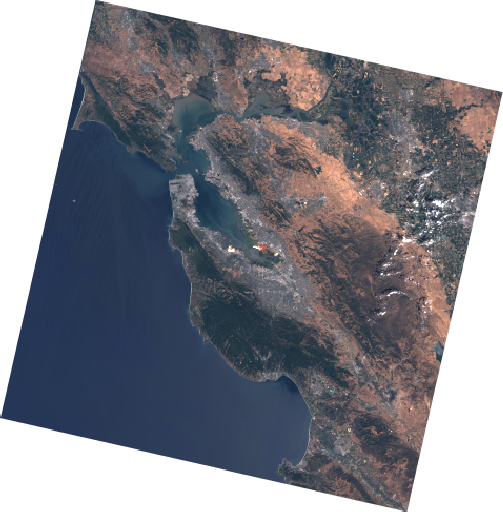

In [3]:
landsat_img = ee.Image('LANDSAT/LC08/C01/T1_RT_TOA/{}'.format(landsat_id))
Image(url=landsat_img.select([3, 2, 1]).getThumbURL({'min': 0.0, 'max': 0.3}),
      embed=True, format='png')

In [4]:
# Build the PT-JPL object
et_reference_params = {
    'et_reference_source': 'IDAHO_EPSCOR/GRIDMET',
    'et_reference_band': 'eto',
    'et_reference_factor': 0.85,
    'et_reference_resample': 'bilinear',
}
ptjpl_obj = ptjpl.Image.from_landsat_c1_toa(landsat_img, **et_reference_params)

# Get the water mask to help with visualizing the various products
water_mask = ptjpl_obj.water_mask

### NDWI

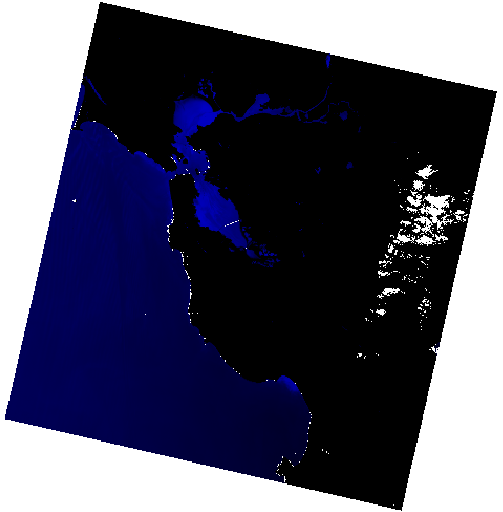

In [5]:
Image(url=ptjpl_obj.NDWI.getThumbURL({'min': 0, 'max': 1, 'palette': '#000000,#0000FF'}), embed=True, format='png')

### MNDWI

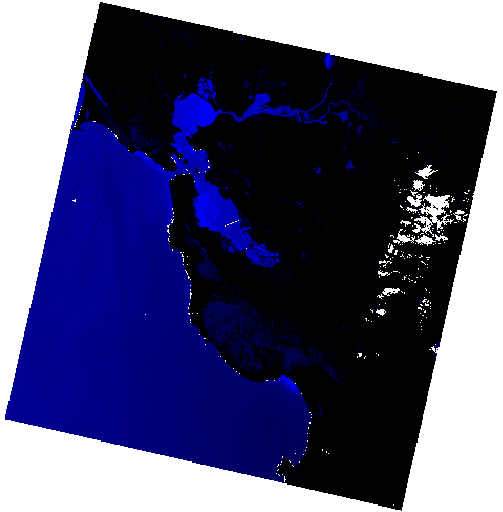

In [6]:
Image(url=ptjpl_obj.MNDWI.getThumbURL({'min': 0, 'max': 1, 'palette': '#000000,#0000FF'}), embed=True, format='png')

### WRI

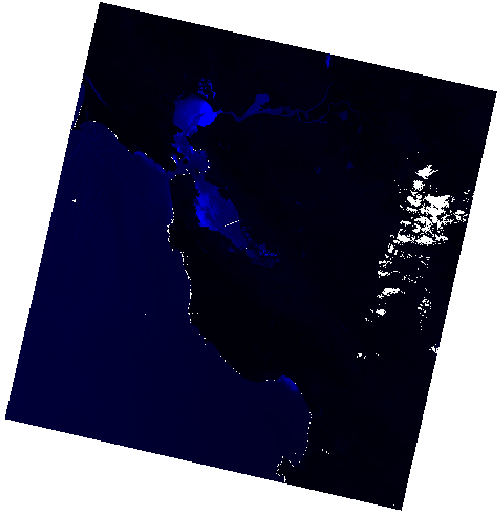

In [7]:
Image(url=ptjpl_obj.WRI.getThumbURL({'min': 0, 'max': 10, 'palette': '#000000,#0000FF'}), embed=True, format='png')

### Water Mask

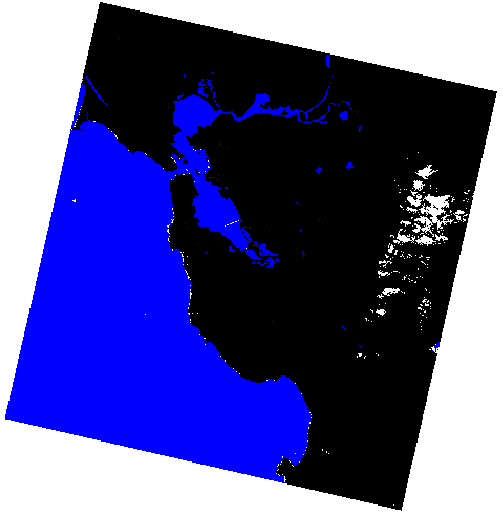

In [8]:
Image(url=ptjpl_obj.water_mask.getThumbURL({'min': 0, 'max': 1, 'palette': '#000000,#0000FF'}), embed=True, format='png')

### Dew-Point

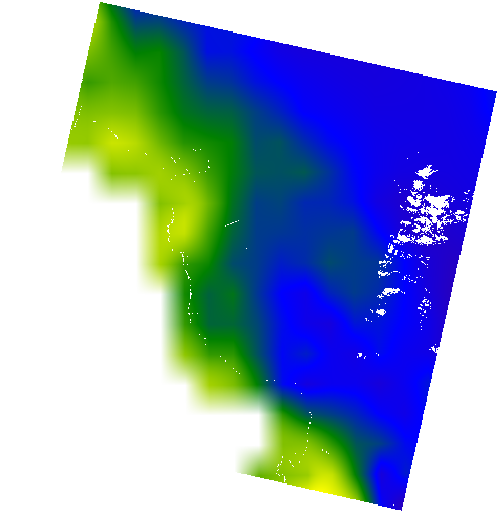

In [9]:
Image(url=ptjpl_obj.Td_C.getThumbURL({'min': 0, 'max': 30, 'palette': ','.join(rainbow_palette)}), embed=True, format='png')

### U

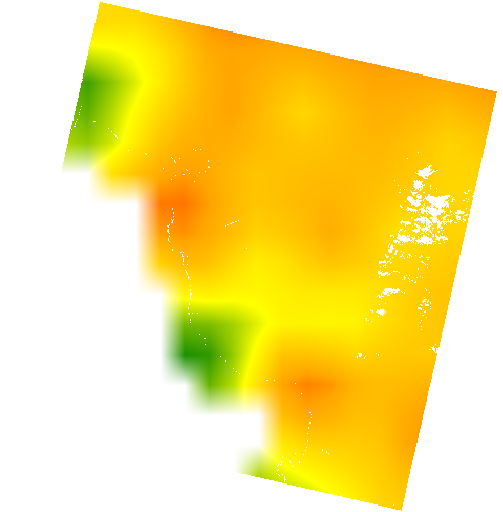

In [10]:
Image(url=ptjpl_obj.U.getThumbURL({'min': 0, 'max': 20, 'palette': ','.join(rainbow_palette)}), embed=True, format='png')

### Surface Temperature

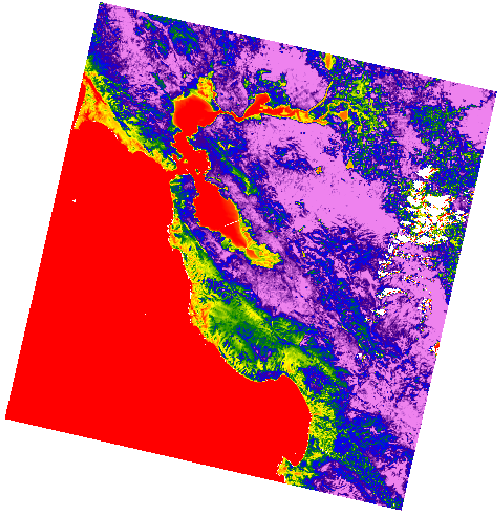

In [11]:
Image(url=ptjpl_obj.ST_C.getThumbURL({'min': 25, 'max': 50, 'palette': ','.join(rainbow_palette)}), embed=True, format='png')

### W

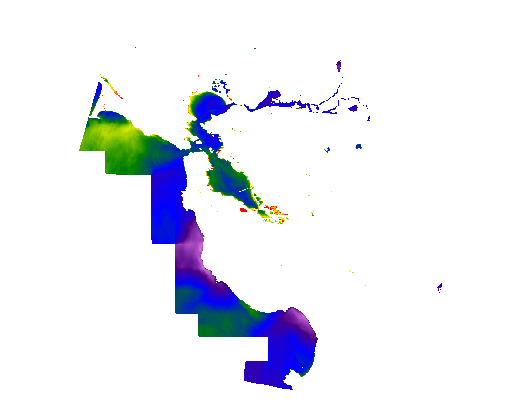

In [12]:
Image(url=ptjpl_obj.W.getThumbURL({'min': 200, 'max': 800, 'palette': ','.join(rainbow_palette)}), embed=True, format='png')

### G

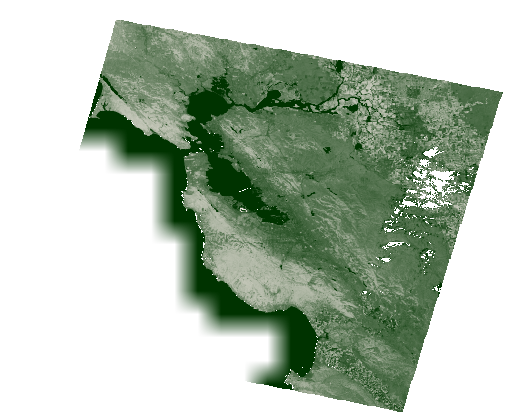

In [13]:
Image(url=ptjpl_obj.G.getThumbURL({'min': 0, 'max': 200, 'palette': ','.join(ndvi_palette)}), embed=True, format='png')

### Rn

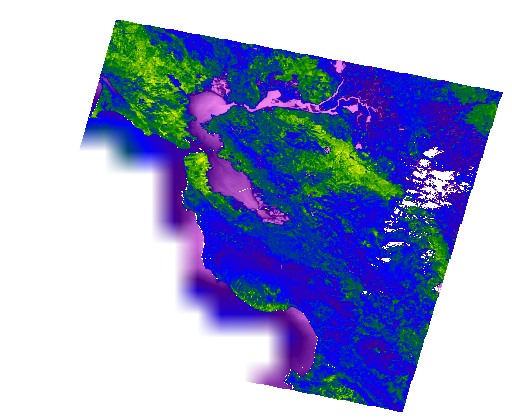

In [14]:
Image(url=ptjpl_obj.Rn.getThumbURL({'min': 200, 'max': 800, 'palette': ','.join(rainbow_palette)}), embed=True, format='png')

### EF

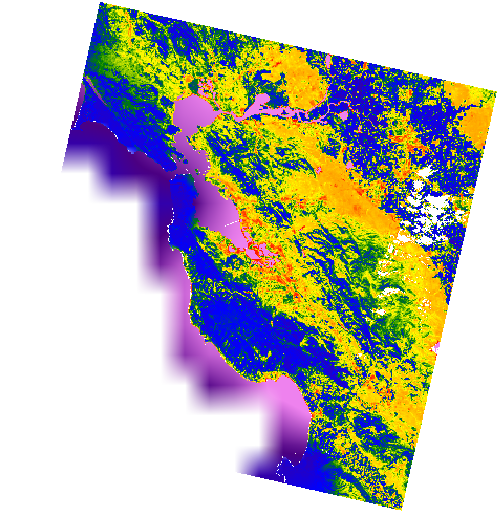

In [15]:
Image(url=ptjpl_obj.EF.getThumbURL({'min': 0, 'max': 1, 'palette': ','.join(rainbow_palette)}), embed=True, format='png')

### PET

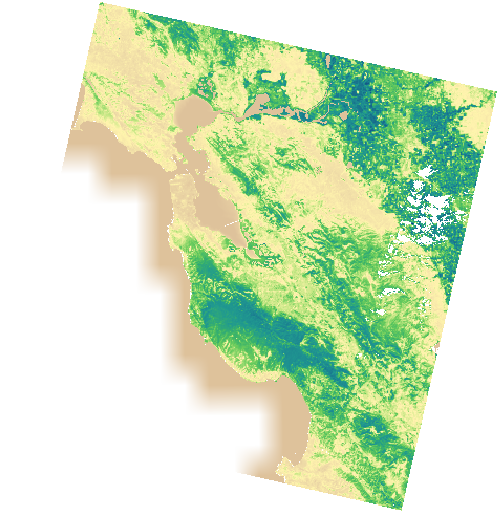

In [16]:
Image(url=ptjpl_obj.PET.getThumbURL({'min': 200, 'max': 800, 'palette': ','.join(et_palette)}), embed=True, format='png')

### Topt

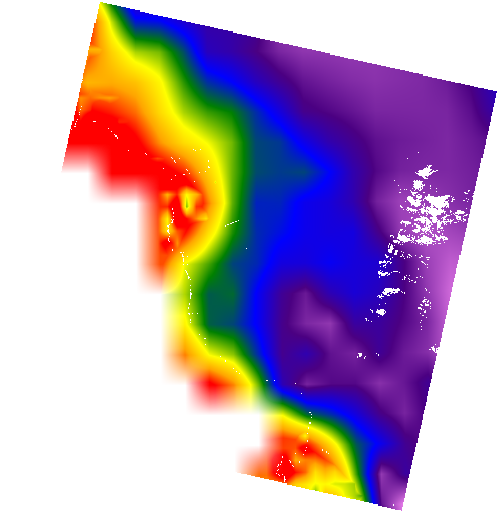

In [17]:
Image(url=ptjpl_obj.Topt.getThumbURL({'min': 20, 'max': 40, 'palette': ','.join(rainbow_palette)}), embed=True, format='png')

### LEc

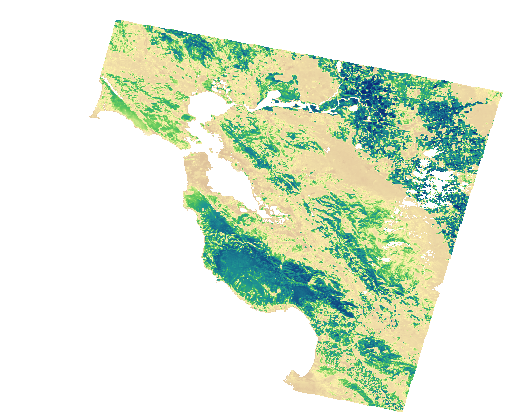

In [18]:
Image(url=ptjpl_obj.LEc.getThumbURL({'min': 0, 'max': 500, 'palette': ','.join(et_palette)}), embed=True, format='png')

### LEi

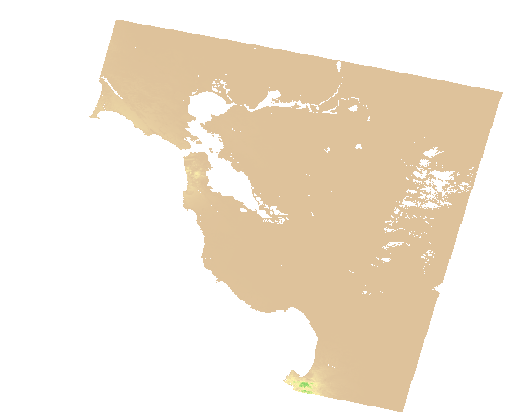

In [19]:
Image(url=ptjpl_obj.LEi.getThumbURL({'min': 0, 'max': 500, 'palette': ','.join(et_palette)}), embed=True, format='png')

### LEs

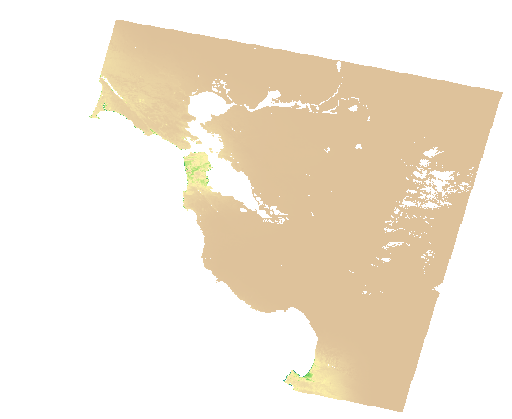

In [20]:
Image(url=ptjpl_obj.LEs.getThumbURL({'min': 0, 'max': 500, 'palette': ','.join(et_palette)}), embed=True, format='png')

### LE: Instantaneous Latent Heat Flux

Agricultural areas then appear at optimal performance with no constraint based on optimum temperature.

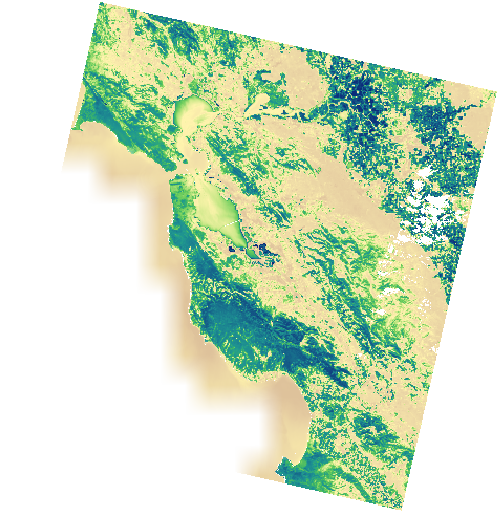

In [21]:
Image(url=ptjpl_obj.LE.getThumbURL({'min': 0, 'max': 500, 'palette': ','.join(et_palette)}), embed=True, format='png')

### PET

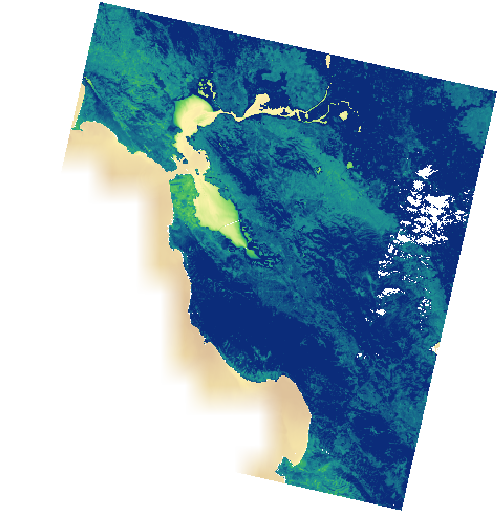

In [22]:
Image(url=ptjpl_obj.PET.getThumbURL({'min': 0, 'max': 500, 'palette': ','.join(et_palette)}), embed=True, format='png')

### daylight

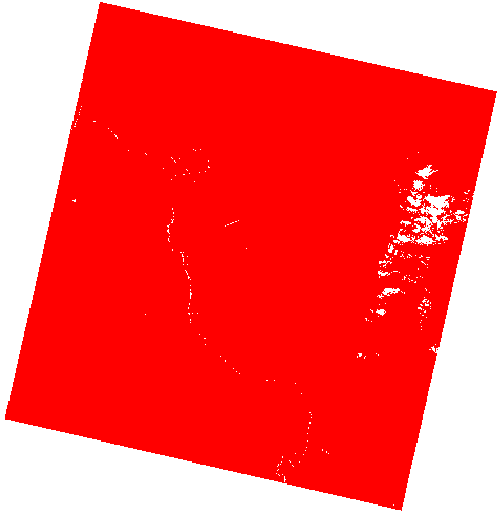

In [23]:
Image(url=ptjpl_obj.daylight_hours.getThumbURL({'min': 20, 'max': 40, 'palette': ','.join(rainbow_palette)}), embed=True, format='png')

### ET: Daily Evapotranspiration in Milimeters

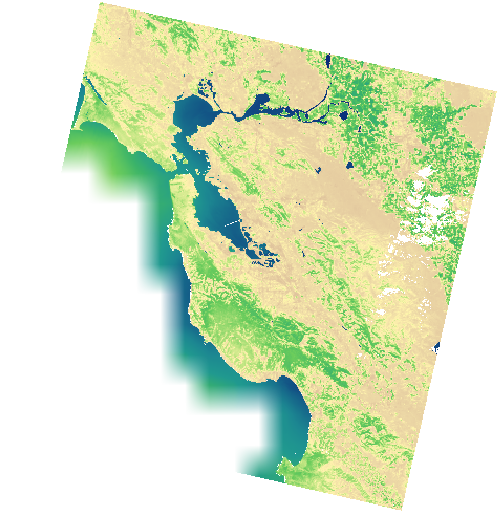

In [24]:
Image(url=ptjpl_obj.et.getThumbURL({'min': 0, 'max': 10, 'palette': ','.join(et_palette)}), embed=True, format='png')

### ETo: Potential Daily Evapotranspiration in Milimeters

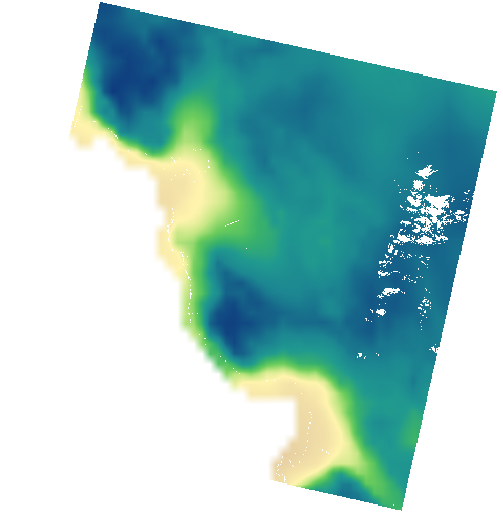

In [25]:
Image(url=ptjpl_obj.et_reference.getThumbURL({'min': 3, 'max': 10, 'palette': ','.join(et_palette)}), embed=True, format='png')

### ETf: Ratio of Actual to Potential Evapotranspiration

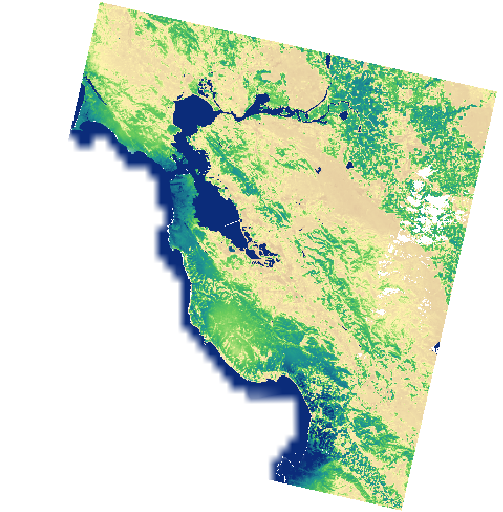

In [26]:
Image(url=ptjpl_obj.et_fraction.getThumbURL({'min': 0, 'max': 1, 'palette': ','.join(et_palette)}), embed=True, format='png')